In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [7]:
file_path = "SalesDATA.csv"  
df = pd.read_csv(file_path)

In [8]:
df.columns = ["Serial_Number", "Product_Code", "Product_Name", "Date", "Units_Sold", "Unit_Price", "Total_Sales"]

In [9]:
df["Date"] = pd.to_datetime(df["Date"], errors='coerce')

In [10]:
df = df.dropna(subset=["Date"])
df_time_series = df.groupby("Date")["Total_Sales"].sum().reset_index()
df_time_series.set_index("Date", inplace=True)

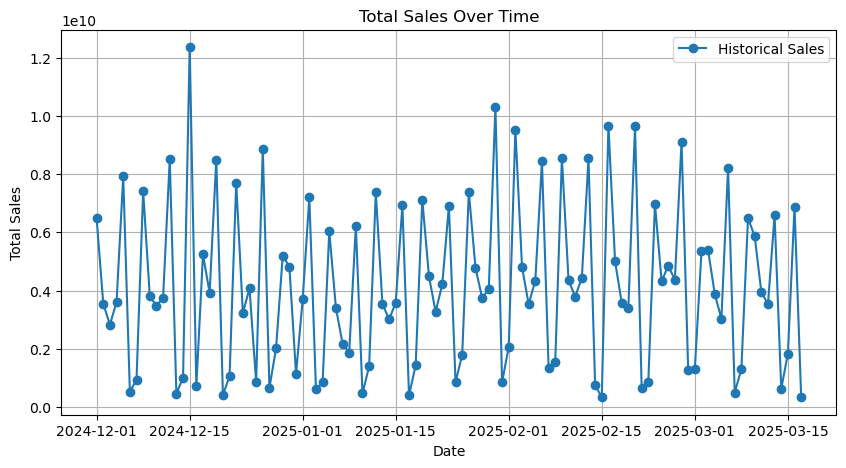

In [32]:
plt.figure(figsize=(10, 5))
plt.plot(df_time_series, label="Historical Sales", marker='o')
plt.title("Total Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.legend()
plt.grid()
plt.show()

In [47]:
model = ARIMA(df_time_series, order=(3,1,0))  # (p=5, d=1, q=0) are initial parameters
model_fit = model.fit()

/home/cyborg/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/cyborg/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/cyborg/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [48]:
forecast_steps = 90
forecast = model_fit.forecast(steps=forecast_steps)

# Generate future dates for predictions
future_dates = pd.date_range(start=df_time_series.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')

# Create a DataFrame with predictions
forecast_df = pd.DataFrame({"Date": future_dates, "Predicted_Sales": forecast})

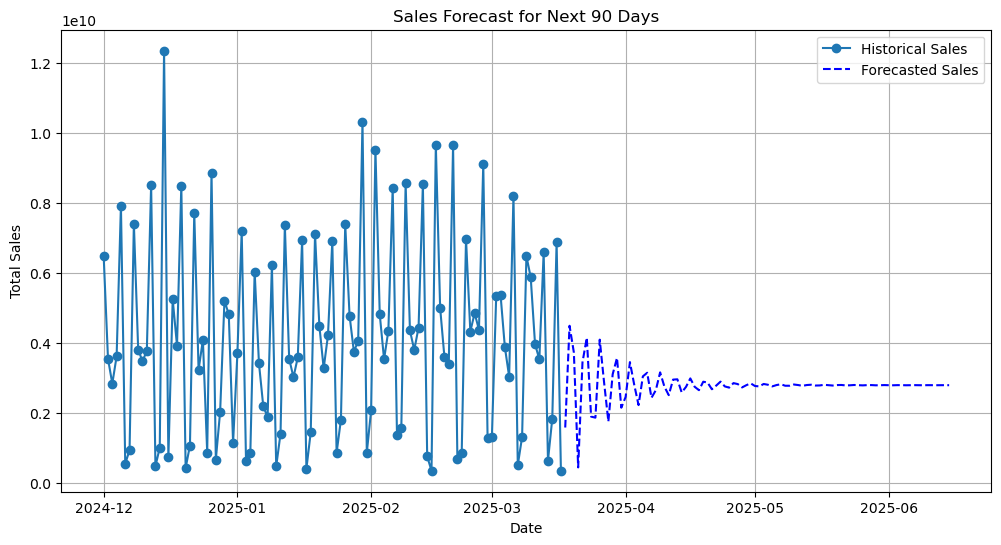

In [49]:
plt.figure(figsize=(12, 6))
plt.plot(df_time_series, label="Historical Sales", marker='o')
plt.plot(forecast_df["Date"], forecast_df["Predicted_Sales"], label="Forecasted Sales", linestyle="dashed", color="blue")
plt.title("Sales Forecast for Next 90 Days")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.legend()
plt.grid()
plt.show()

In [50]:
forecast_df.to_csv("Sales_Forecast_90_Days.csv", index=False)

# Display the forecasted sales
print(forecast_df.head(10))  # Show the first 10 predictions

                 Date  Predicted_Sales
2025-03-18 2025-03-18     1.574298e+09
2025-03-19 2025-03-19     4.485530e+09
2025-03-20 2025-03-20     3.724050e+09
2025-03-21 2025-03-21     4.330125e+08
2025-03-22 2025-03-22     3.439422e+09
2025-03-23 2025-03-23     4.145789e+09
2025-03-24 2025-03-24     1.886435e+09
2025-03-25 2025-03-25     1.856615e+09
2025-03-26 2025-03-26     4.088172e+09
2025-03-27 2025-03-27     2.874986e+09


In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [52]:
def evaluate_forecast(actual_values, predicted_values):
    """
    Improved Accuracy Calculation for Sales Forecast.
    
    Parameters:
    actual_values (pd.Series): True sales values.
    predicted_values (pd.Series): Forecasted sales values.

    Returns:
    dict: Contains MAE, MSE, RMSE, MAPE, and NRMSE.
    """
    mae = mean_absolute_error(actual_values, predicted_values)
    mse = mean_squared_error(actual_values, predicted_values)
    rmse = np.sqrt(mse)
    
    # Mean Absolute Percentage Error (MAPE)
    mape = np.mean(np.abs((actual_values - predicted_values) / actual_values)) * 100

    # Normalized RMSE (NRMSE)
    nrmse = rmse / (actual_values.max() - actual_values.min())

    return {
        "Mean Absolute Error (MAE)": mae,
        "Mean Squared Error (MSE)": mse,
        "Root Mean Squared Error (RMSE)": rmse,
        "Mean Absolute Percentage Error (MAPE)": mape,
        "Normalized RMSE (NRMSE)": nrmse
    }


In [53]:
test_days = 30
actual_sales = df_time_series[-test_days:]  # Last 30 days actual sales
predicted_sales = model_fit.forecast(steps=test_days)  # Forecast for same period

# Evaluate the model
accuracy_results = evaluate_forecast(actual_sales, predicted_sales)

# Print the improved accuracy results
for metric, value in accuracy_results.items():
    if isinstance(value, (float, int)):
        print(f"{metric}: {value:.2f}")
    else:
        print(f"{metric}: {value.mean():.2f}")

Mean Absolute Error (MAE): 2649018447.88
Mean Squared Error (MSE): 10741034103561261056.00
Root Mean Squared Error (RMSE): 3277351690.55
Mean Absolute Percentage Error (MAPE): nan
Normalized RMSE (NRMSE): 0.35
